<div class="alert alert-block alert-info">
    <h1>Natural Language Processing</h1>
    Assignment 02
    <h3>General Information:</h3>
    <p>Please do not add or delete any cells. Answers belong into the corresponding cells (below the question). If a function is given (either as a signature or a full function), you should not change the name, arguments or return value of the function.<br><br> If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.<br><br>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>).</p>
    <p>Code cells where you are supposed to give your answer often include the line  ```raise NotImplementedError```. This makes it easier to automatically grade answers. If you edit the cell please outcomment or delete this line.</p>
    <h3>Submission:</h3>
    <p>Please submit your notebook via the web interface (in the main view -> Assignments -> Submit). The assignments are due on <b>Monday at 13:00</b>.</p>
    <h3>Group Work:</h3>
    <p>You are allowed to work in groups of up to three people. Please enter the UID (your username here) of each member of the group into the next cell. We apply plagiarism checking, so do not submit solutions from other people except your team members. If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.</p>
    <h3>Questions about the Assignment:</h3>
    <p>If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions.</p>
    
</div>

In [ ]:
'''
Group Work:
Enter the UID of each team member into the variables. This is your **LEA username**!
If you work alone please leave the second variable empty.
'''
member1 = 'mfarra2s'
member2 = ''
member3 = ''

# Bigram Language Model

We want to build a count based bigram language model based on movie scripts.

In the next cell the movie scripts are read into the variables ```sents``` and ```words``` for the movies *Iron Man 2*, *Iron Man 3*, *Spider-Man Homecoming*.

In [2]:
import pickle

def load_data(path):
    with open(path, "rb") as f:
        sents = pickle.loads(f.read())
        words = [word for sent in sents for word in sent]
    return sents, words

iron_man2_sents, iron_man2_words = load_data("/srv/shares/NLP/datasets/marvel/iron_man_2.pkl")
iron_man3_sents, iron_man3_words = load_data("/srv/shares/NLP/datasets/marvel/iron_man_3.pkl")
spider_man_sents, spider_man_words = load_data("/srv/shares/NLP/datasets/marvel/spider_man_homecoming.pkl")

spider_man_words

['[',
 'Adrian',
 'Toomes',
 'and',
 'his',
 'coworker',
 ',',
 'Phineas',
 'Mason',
 ',',
 'are',
 'studying',
 'a',
 'child',
 "'s",
 'drawing',
 'of',
 'the',
 'Avengers',
 '.',
 ']',
 'Toomes',
 ':',
 'Things',
 'are',
 'never',
 'gon',
 'na',
 'be',
 'the',
 'same',
 'now',
 '.',
 'I',
 'mean',
 ',',
 'look',
 'at',
 'this',
 '.',
 'You',
 'got',
 'aliens',
 '.',
 'You',
 'got',
 'big',
 'green',
 'guys',
 'tearing',
 'down',
 'buildings',
 '.',
 'When',
 'I',
 'was',
 'a',
 'kid',
 ',',
 'I',
 'used',
 'to',
 'draw',
 'cowboys',
 'and',
 'Indians',
 '.',
 'Mason',
 ':',
 'Actually',
 ',',
 'it',
 "'s",
 'Native',
 'American',
 ',',
 'but',
 'whatever',
 '.',
 'Toomes',
 ':',
 'Yeah',
 '.',
 'Tell',
 'you',
 'what',
 ',',
 'though',
 '.',
 'It',
 'ai',
 "n't",
 'bad',
 ',',
 'is',
 'it',
 '?',
 '[',
 'Toomes',
 'squints',
 'at',
 'the',
 'drawing',
 'and',
 'Mason',
 'nods',
 '.',
 ']',
 'Mason',
 ':',
 'No',
 '.',
 'Yeah',
 '.',
 'Kid',
 "'s",
 'got',
 'a',
 'future',
 '.',
 'Too

In [ ]:
import glob

glob.glob("/srv/shares/NLP/datasets/marvel/*.pkl")

## 1.1) Statistics [4 Points]

Please calculate the number of types and tokens for the movie *Spider-Man* and save the values in the variables ```types``` and ```tokens```.

In [4]:
types = 0
tokens = 0
# YOUR CODE HERE
types = len(set(spider_man_words))
tokens = len(spider_man_words)
# raise NotImplementedError()

print('The script for Spider-Man Homecoming consists of {} tokens and {} types.'.format(
    tokens,
    types
))

The script for Spider-Man Homecoming consists of 39530 tokens and 4115 types.


In [ ]:
# This is a test cell, please ignore it!

## 1.2) Heap's Law

Let us validate Heap's law from the first chapter we read:

$|V| = k * N^{\beta}$

### 1.2.1) Empirical Study [8 Points]

We first want to plot the relationship between types and tokens for the script *Spider-Man Homecoming*.

For this you should fill the lists ```number_of_types``` and ```number_of_tokens``` with the corresponding values.

So we want to investigate how many types we have after 1 token, 2 tokens, 3 tokens until we have read all the words from the book.

*Example:*

- ```number_of_tokens```: ```[1, 2, 3, ..., 16, 17, 18, ...]```
- ```number_of_types```:  ```[1, 2, 3, ..., 13, 14, 14, ...]```

In [6]:
number_of_tokens = []
number_of_types = []

# YOUR CODE HERE
for i in range(1,tokens+1):
    number_of_tokens.append(i)
    number_of_types.append(len(set(spider_man_words[0:i])))

# raise NotImplementedError()

for i in [10, 100, 1000, 10000]:
    print('After reading {} tokens we found {} types.'.format(
        number_of_tokens[i - 1], number_of_types[i - 1]
    ))

After reading 10 tokens we found 9 types.
After reading 100 tokens we found 68 types.
After reading 1000 tokens we found 395 types.
After reading 10000 tokens we found 1929 types.


### 1.2.2) Plot [10 Points]

Please plot your findings:

- x-Axis: Number of tokens
- y-Axis: Number of types

Make sure your plot has a grid, a legend, a title and x- and y-label.

Add the values for the three movies **Iron Man 2** and **Iron Man 3** to the plot as a single point (total number of tokens, total number of types)

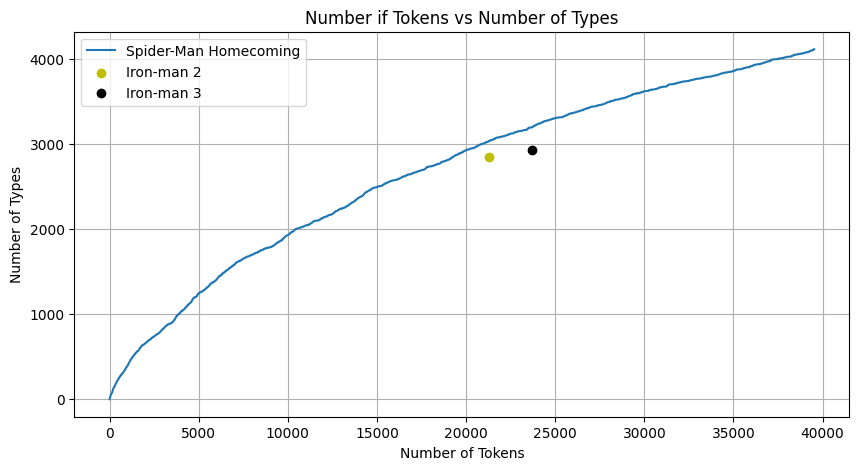

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# YOUR CODE HERE
plt.plot(number_of_tokens,number_of_types, label='Spider-Man Homecoming')
plt.scatter(len(iron_man2_words),len(set(iron_man2_words)), c='y', label='Iron-man 2')
plt.scatter(len(iron_man3_words),len(set(iron_man3_words)), c='k',  label='Iron-man 3')
plt.title('Number if Tokens vs Number of Types')
plt.grid(True)
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Types')
plt.legend()
plt.show()

### 1.2.3) Estimate parameters $k$ and $\beta$ [8 points]

We want to estimate the parameters $k$ and $\beta$ for Heap's law based on our movie.

Use the function ```curve_fit``` from ```scipy.optimize``` with the previously calculated lists. Save your solution in the variables ```k``` and ```beta```.

```curve_fit``` takes in three arguments, the function that relatex x values to y values together with its parameters, the observed x-values and the observed y-values. It return popt (the optimal parameters) and pcov (how well they fit).

In [29]:
from scipy.optimize import curve_fit

def func(x, k, beta):
    return k * x**beta

k = 0
beta = 0

# YOUR CODE HERE

params, covariance = curve_fit(func, number_of_tokens, number_of_types)

k, beta = params
# raise NotImplementedError()

print('For the movie Spider-Man we estimate k = {:.2f} and beta = {:.2f}'.format(
    k,
    beta
))

For the movie Spider-Man we estimate k = 10.23 and beta = 0.57


### 1.2.4) Combined plot [10 Points]

In our Marvel corpus we have the following movies:

- Iron Man 2 
- Iron Man 3 
- Spider-Man Homecoming 

Plot the number of types and tokens for each movie as a point (total number of types and tokens) together with the function $|V| = k N^{\beta}$ with your estimated parameters.

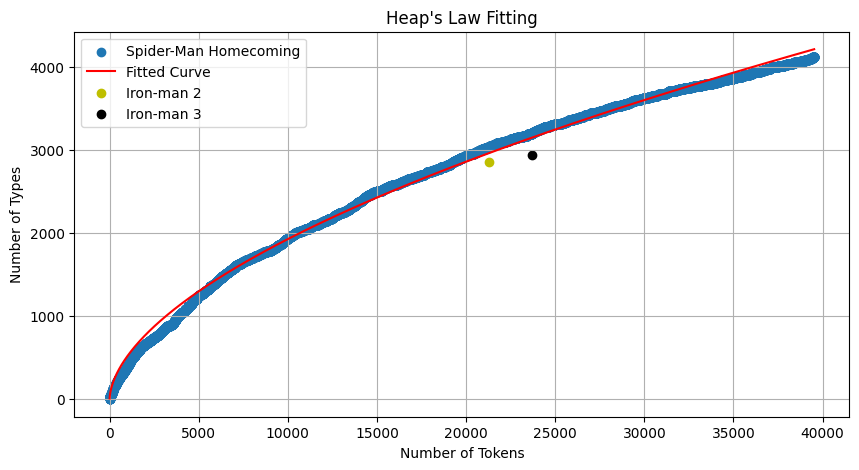

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
# YOUR CODE HERE
plt.scatter(number_of_tokens, number_of_types, label='Spider-Man Homecoming')
plt.plot(number_of_tokens, func(number_of_tokens, *params), color='r', label='Fitted Curve')
plt.scatter(len(iron_man2_words),len(set(iron_man2_words)), c='y', label='Iron-man 2')
plt.scatter(len(iron_man3_words),len(set(iron_man3_words)), c='k',  label='Iron-man 3')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Types')
plt.title("Heap's Law Fitting")
plt.grid(True)
plt.legend()
plt.show()

## 2.1) Bigram Model [50 Points]

We now want to build a bigram language model from the movie *Spider-Man Homecoming*.

For this you should use the class given in the next cell.

1. Read in the sentences from the movie *Spider-Man Homecoming*
2. Write a method that returns the unigram count
3. Write a method that returns the unigram probability
4. Write a method that returns the bigram count
5. Write a method that returns the bigram probability
6. Write a method that returns the sentence probability based on bigrams

*Hints:*

- The next cell gives you some inspiration on how to implement the counting of bigrams
- Everything should be precomputed in the constructor (```__init__```) and the other functions should not recount anything. If implemented efficiently all the computation will be done in a few seconds (less than 10)!
- This class should be **self-contained** and not depend on any code from previous cells!
- The ```window``` function is a memory friendly iterator over a list that gives you all n-grams from the list

In [35]:
'''
Example (you do not need to edit this cell):

Suppose you have a very small corpus consisting of only the
four unique words 'I', 'have', 'a', 'dog' and 
the sentence start and end markers '<s>' and '</s>'

The corpus has the three sentences
- <s> I have a dog </s>
- <s> a dog I have </s>
- <s> a dog </s>
'''
import numpy as np

# First we define the index for each word (the order does not matter)
index = {
    'I': 0,
    'have': 1,
    'a': 2,
    'dog': 3,
    '<s>': 4,
    '</s>': 5
}

# These are our bigrams from the sentences
bigrams = [('<s>', 'I'), ('I', 'have'), ('have', 'a'), ('a', 'dog'), ('dog', '</s>'),
           ('</s>', '<s>'), ('<s>', 'a'), ('a', 'dog'), ('dog', 'I'), ('I', 'have'), ('have', '</s>'),
           ('</s>', '<s>'), ('<s>', 'a'), ('a', 'dog'), ('dog', '</s>')]

# Next we create a matrix for the bigram counts,
# each entry is a 16 Bit unsigned integer (dtype=np.uint16)
counts = np.zeros((len(index), len(index)), dtype=np.uint16)

# Fill it with the counts
for bigram in bigrams:
    index_first_word = index[bigram[0]]
    index_second_word = index[bigram[1]]
    counts[index_first_word, index_second_word] += 1
    
# Print out count matrix
print(counts)

# Check the count for the bigram ('I', 'have'):
print('The bigram ("I", "have") exists {} times.'.format(
    counts[index['I'], index['have']]
))

[[0 2 0 0 0 0]
 [0 0 1 0 0 1]
 [0 0 0 3 0 0]
 [1 0 0 0 0 2]
 [1 0 2 0 0 0]
 [0 0 0 0 2 0]]
The bigram ("I", "have") exists 2 times.


In [3]:
import numpy as np
from typing import List
from collections import Counter
from itertools import islice
from nltk.corpus import gutenberg

class BigramModel:
    
    def __init__(self, sentences: List[List[str]]):
        '''
        Takes in a list of sentences, where each sentence is a 
        list of words.
        
        Arguments:
            sentences -- List of lists of words (e.g. [['I', 'have', 'a', 'dog'],
                                                       ['a', 'dog', 'I', 'have']])
        '''
        # YOUR CODE HERE
        
        #Adding sentnce start '<s>' and ending '</s>'
        for sent in sentences:
            sent.insert(0, '<s>')
            sent.append('</s>')
        
        # extracting words out of sentences
        self.words = [word for sentence in sentences for word in sentence]
            
        self.unigrams = Counter(self.words)
        self.vocabulary = self.unigrams.keys()
        
        self.index = {word: index for index, word in enumerate(self.vocabulary)}
        
        self.bigrams = []
        for pair in self.window(self.words):
            self.bigrams.append(pair)
                
        self.counts = np.zeros((len(self.index), len(self.index)), dtype=np.uint16)
        
        for bigram in self.bigrams:
            index_first_word = self.index[bigram[0]]
            index_second_word = self.index[bigram[1]]
            self.counts[index_first_word, index_second_word] += 1
#         raise NotImplementedError()
        
    def window(self, seq, n=2):
        '''
        Returns a sliding window (of width n) over data from the iterable
        
        Arguments:
            seq      -- the iterable (e.g. list, set, etc) to run the window over
            n        -- the size of the window
        Returns:
            iterator -- an iterator over the sliding windows
            
        Usage:
            my_list = [1, 2, 3, 4]
            for slice in self.window(my_list):
                print(slice)
                
            # Output: (1, 2)
                      (2, 3)
                      (3, 4)
        '''
        "Returns a sliding window (of width n) over data from the iterable"
        "   s -> (s0,s1,...s[n-1]), (s1,s2,...,sn), ...                   "
        it = iter(seq)
        result = tuple(islice(it, n))
        if len(result) == n:
            yield result
        for elem in it:
            result = result[1:] + (elem,)
            yield result
            
    def unigram_count(self, word: str) -> int:
        '''
        Returns the unigram count for the word.
        If the word does not exist in our corpus, return 0.
        
        Arguments:
            word  -- word we want to know the count of
        Returns:
            count -- how often the word appears in the corpus
        '''
        # YOUR CODE HERE
        if word in self.vocabulary:
            return self.unigrams[word]
        else:
            return 0
#         raise NotImplementedError()
        
    def unigram_probability(self, word:str) -> float:
        '''
        Returns the unigram probability for the word.
        If the word does not exist in our corpus, return 0.
        
        Arguments:
            word        -- word we want to know the probability of
        Returns:
            probability -- how likely it is to choose the word at random
        '''
        # YOUR CODE HERE
        if word in self.vocabulary:
            return self.unigrams[word]/np.sum(list(self.unigrams.values()))
        else:
            return 0
#         raise NotImplementedError()
    
    def bigram_count(self, word1:str, word2:str) -> int:
        '''
        Returns the bigram count for the word1 followed by word2.
        If either of the words does not exist in our corpus, return 0.
        
        Arguments:
            word1  -- first word of the bigram
            word2  -- second word of the bigram
        Returns:
            count  -- how often the bigram appears in the corpus
        '''
        # YOUR CODE HERE
        if word1 in self.vocabulary and word2 in self.vocabulary:
            return self.counts[self.index[word1], self.index[word2]]
        else:
            return 0

#         raise NotImplementedError()
        
    def bigram_probability(self, word1:str, word2:str) -> float:
        '''
        Returns the bigram probability for the word1 followed by word2.
        This is the conditional probability P(word2 | word1).
        If either of the words does not exist in our corpus, return 0.
        
        Arguments:
            word1       -- first word of the bigram
            word2       -- second word of the bigram
        Returns:
            probability -- how likely it is to choose the word at random
        '''
        # YOUR CODE HERE
        if word1 in self.vocabulary and word2 in self.vocabulary:
            return self.counts[self.index[word1], self.index[word2]] / self.unigrams[word1]
        else:
            return 0
#         raise NotImplementedError()
    
    def sentence_probability(self, sentence:List[str]) -> float:
        '''
        Return the probability for the given sentence based on our
        bigram probabilities
        
        Arguments:
            sentence    -- list of tokens from the sentence 
                           (e.g. ['<s>', 'I', 'have', 'a', 'dog', '</s>'])
        Returns:
            probability -- probability of the sentence
        '''
        # YOUR CODE HERE
        for word in sentence:
            if word in self.vocabulary:
                continue
            else:
                return 0
        cond_prob = [] 
        for pair in self.window(sentence):
            cond_prob.append(self.bigram_probability(str(pair[0]),str(pair[1])))
        return np.prod(cond_prob)
#         raise NotImplementedError()
          
sents, words = load_data("/srv/shares/NLP/datasets/marvel/spider_man_homecoming.pkl")
model = BigramModel(sents)

# Some prints and tests

print('The unigram "Peter" appears {} times in the book!'.format(
    model.unigram_count('Peter')
)) ## Should print 1254

print('The probability for the unigram "Happy" is {:.4f}.'.format(
    model.unigram_probability('Happy')
)) ## Should print 0.0026

print('The bigram "I am" appears {} times in the book!'.format(
    model.bigram_count('I', 'am')
)) ## Should print 3

print('The probability for the bigram "I have" is {:.4f}.'.format(
    model.bigram_probability('I', 'have')
)) ## Should print 0.0233

print('The sentence probability for the sentence "Alien artifacts lie among the rubble." is {:.4e}.'.format(
    model.sentence_probability(['<s>', 'Alien', 'artifacts', 'lie', 'among', 'the', 'rubble', '.', '</s>'])
)) ## Should print 7.2583e-08

The unigram "Peter" appears 1254 times in the book!
The probability for the unigram "Happy" is 0.0026.
The bigram "I am" appears 3 times in the book!
The probability for the bigram "I have" is 0.0233.
The sentence probability for the sentence "Alien artifacts lie among the rubble." is 7.2583e-08.


## 2.2) Using the model [10 Points]

With our model we can now answer some questions.

1. How often does a certain word appear in the movie?
    - Give the number of times the word 'Avengers' appears in the book - Store this in the variable ```count_Avengers```.
    - Give the number of times the word 'She' appears in the book - Store this in the variable ```count_She```.
2. How many sentences start or end with a certain word or token?
    - Give the probability that a sentence starts with the word 'I' - Store this in the variable ```p_sentence_begins_with_I```
    - Give the probability that a sentence ends with '!' in contrast to sentences ending in other words - Store this in the variable ```p_sentence_ends_in_exlamation``` 

In [5]:
sentences, _ = load_data("/srv/shares/NLP/datasets/marvel/spider_man_homecoming.pkl")
model = BigramModel(sentences)

count_Avengers = 0
count_She = 0
p_sentence_begins_with_I = 0
p_sentence_ends_in_exlamation = 0

# YOUR CODE HERE
count_Avengers = model.unigram_count('Avengers')
count_She = model.unigram_count('She')
p_sentence_begins_with_I = model.bigram_probability('<s>','I')
p_sentence_ends_in_exlamation = model.bigram_probability('!','</s>')
# raise NotImplementedError()

print('The word "Avengers" appears {} time(s) in the movie.'.format(
    count_Avengers
))
print('The word "She" appears {} time(s) in the movie.'.format(
    count_She
))
print('The probability that a sentence starts with "I" is {:.4f}'.format(
    p_sentence_begins_with_I
))
print('The probability that a sentence ends in "!" is {:.4f}'.format(
    p_sentence_ends_in_exlamation
))

The word "Avengers" appears 22 time(s) in the movie.
The word "She" appears 17 time(s) in the movie.
The probability that a sentence starts with "I" is 0.0415
The probability that a sentence ends in "!" is 0.9827


In [ ]:
# This is a test cell, please ignore it!

### Generating Random Sentences

You are given the following function that given a model can generate random sentences.

You might need to change some lines if your implementation significantly differs from mine, but the idea is to:

- Have a reverse index where an id is mapped to a token
- Have an index where a token is mapped to an id
- Have a bigram_counts matrix

Whenever you execute the function it will generate a random sentence. You can also try this with the other movies.

**This is not graded**

In [6]:
import random as rd

def generate_random_sentence(model):
    start = '<s>'
    end = '</s>'


    reverse_index = {value: key for key, value in model.index.items()}

    sentence = [start]
    token = sentence[-1]
    while token != end:

        index = model.index[token]
        row = model.bigram_counts[index, :]
        token = rd.choices(range(len(row)), weights=row)[0]
        token = reverse_index[token]
        sentence.append(token)

    return ' '.join(sentence)

sentences, _ = load_data("/srv/shares/NLP/datasets/marvel/guardians_2.pkl")
model = BigramModel(sentences)
generate_random_sentence(model)

AttributeError: 'BigramModel' object has no attribute 'bigram_counts'